In [1]:
from frechetMeanGraph_constant_q import *

from matplotlib import pyplot as plt
plt.style.use(['classic','ggplot'])
from matplotlib import ticker

import pandas as pd

/Users/oliviacourtney/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/oliviacourtney/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_22359/1381394199.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466

In [2]:
sample1 = GraphEnsemble(n = 1023, N = 50, dP = (18*math.log2(1023/2)/(1023/2), 12*math.log2(1023/2)/(1023/2), 6*math.log2(1023/2)/(1023/2)))
sample1.fill_graphs_SBM()
sample1.fill_eigs()

/Users/oliviacourtney/frechet/frechet_private/DatasetExps/frechetMeanGraph_constant_q.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  self.eigs[i,:] = spla.eigs(self.graphs[i], k = self.k, which = 'LR', return_eigenvectors=False)


In [3]:
start_val = [0.39,0.25,0.14]
val1, frechetval_history1, frechetgrad_history1 = grad_descent(frechet_func, start_val, sample = sample1, 
                                                               dx = 0.001, learn_rate = 0.00015, tol = 1e-6, nmax=80)

In [4]:
len(frechetval_history1), frechet_func(val1, sample1)

(80, 2.089023068307976e-06)

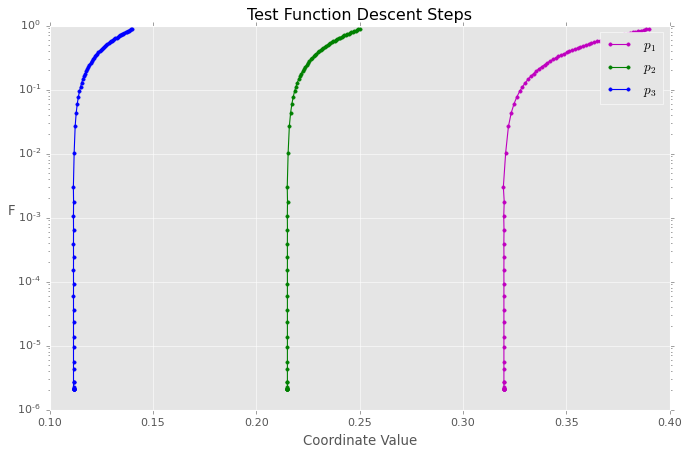

In [5]:
plt.figure(figsize=(10,6))
plt.yscale("log")
path1 = []
path2 = []
pathq = []
for i in range(len(frechetval_history1)):
    path1.append((frechetval_history1[i][0][0], frechetval_history1[i][1]))
    path2.append((frechetval_history1[i][0][1], frechetval_history1[i][1]))
    pathq.append((frechetval_history1[i][0][2], frechetval_history1[i][1]))

plt.plot([path1[i][0] for i in range(len(path1))], [path1[j][1] for j in range(len(path1))], '.m-')
plt.plot([path2[i][0] for i in range(len(path2))], [path2[j][1] for j in range(len(path2))], '.g-')
plt.plot([pathq[i][0] for i in range(len(pathq))], [pathq[j][1] for j in range(len(pathq))], '.b-')


plt.xlabel('Coordinate Value')
plt.ylabel('F', rotation=0)
plt.title('Test Function Descent Steps')
plt.legend(['$p_1$ ', '$p_2$', '$p_3$'])
plt.show()

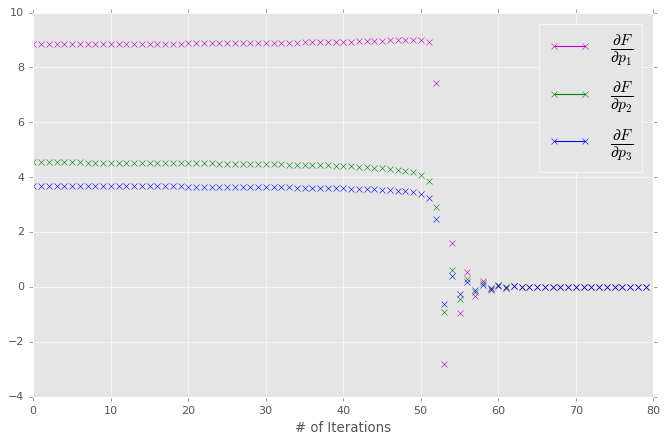

In [6]:
plt.figure(figsize=(10,6))
#plt.yscale("log")
for i in range(len(frechetgrad_history1)):
    plt.plot(i,(frechetgrad_history1[i][0]), marker = 'x', color = 'm')
    plt.plot(i,(frechetgrad_history1[i][1]), marker = 'x', color = 'g')
    plt.plot(i,(frechetgrad_history1[i][2]), marker = 'x', color = 'b')

plt.xlabel('# of Iterations')
#plt.title('Gradient vs Iterations')
plt.legend([r'$\frac{\partial F}{\partial p_1}$', r'$\frac{\partial F}{\partial p_2}$', r'$\frac{\partial F}{\partial p_3}$'], prop={'size': 20})
#plt.savefig('PSgradient_first.pdf',bbox_inches='tight')
plt.show()

In [7]:
r = 20
ax1 = np.linspace(0.26,0.4, r)
ax2 = np.linspace(0.15,0.26, r)
axq = np.linspace(0.09,0.15, r)

grid1 = np.zeros([r,r,r])

for i in range(r):
    for j in range(r):
        for ki in range(r):
            grid1[i,j,ki] = frechet_func([ax1[i], ax2[j], axq[ki]], sample1)

/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_22359/39116418.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[0], format='%.3f')
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_22359/39116418.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[1], format='%.3f')
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_22359/39116418.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[2], format='%.3f')


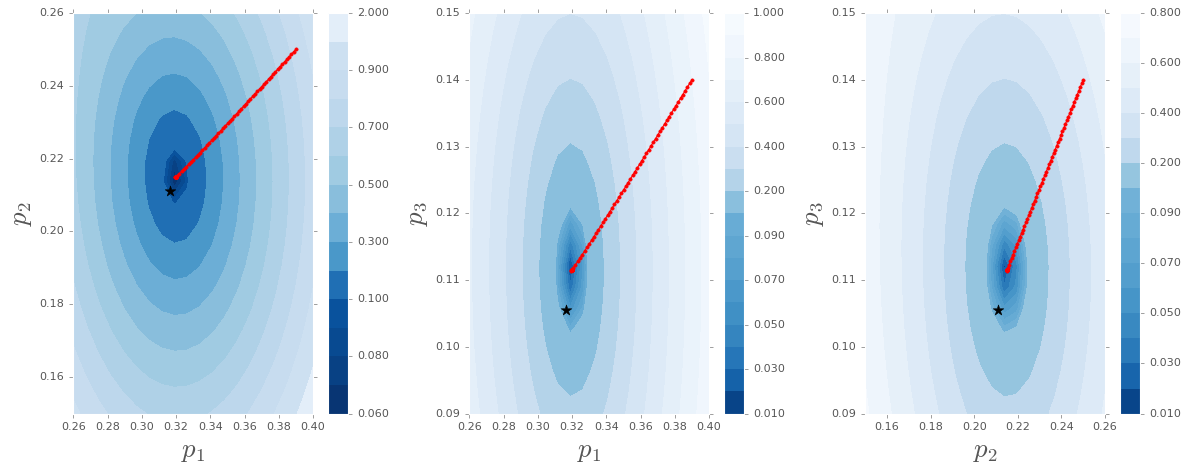

In [10]:
dP = sample1.dP
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

X, Y = np.meshgrid(ax1,ax2, indexing='ij')
#cb = axs[0].contourf(X, Y, grid1[:,:,2] ,cmap ='Blues')
cb = axs[0].contourf(X, Y, grid1[:,:,5], locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[0].set_xlabel('$p_{1}$', size=24)
axs[0].set_ylabel('$p_{2}$',size = 24)
axs[0].scatter(dP[0],dP[1], label=f'Estimated Min: ({dP[0]:.5f}, {dP[1]:.5f})', marker='*', s=100, color = 'k')
axs[0].plot([frechetval_history1[i][0][0] for i in range(len(frechetval_history1))], 
         [frechetval_history1[j][0][1] for j in range(len(frechetval_history1))], '.r-')

fig.colorbar(cb, ax=axs[0], format='%.3f')

X, Y = np.meshgrid(ax1,axq, indexing='ij')
cb = axs[1].contourf(X, Y, grid1[:,11,:],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[1].set_xlabel('$p_{1}$', size=24)
axs[1].set_ylabel('$p_3$',size = 24)
axs[1].scatter(dP[0],dP[2], label=f'Estimated Min: ({dP[0]:.5f}, {dP[2]:.5f})', marker='*', s=100, color = 'k')
axs[1].plot([frechetval_history1[i][0][0] for i in range(len(frechetval_history1))], 
         [frechetval_history1[j][0][2] for j in range(len(frechetval_history1))], '.r-')

fig.colorbar(cb, ax=axs[1], format='%.3f')

X, Y = np.meshgrid(ax2,axq, indexing='ij')
cb = axs[2].contourf(X, Y, grid1[8,:,:],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[2].set_xlabel('$p_{2}$', size=24)
axs[2].set_ylabel('$p_3$',size = 24)
axs[2].scatter(dP[1],dP[2], label=f'Estimated Min: ({dP[1]:.5f}, {dP[2]:.5f})', marker='*', s=100, color = 'k')
axs[2].plot([frechetval_history1[i][0][1] for i in range(len(frechetval_history1))], 
         [frechetval_history1[j][0][2] for j in range(len(frechetval_history1))], '.r-')

fig.colorbar(cb, ax=axs[2], format='%.3f')
fig.tight_layout()

#plt.savefig('SBMmap.pdf')
plt.show()